In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime

In [62]:
print(f"Notebook last run (end to end): {datetime.datetime.now()}")

Notebook last run (end to end): 2023-09-22 07:23:56.986291


In [63]:
!ls /content/drive/MyDrive/data

forest	himalyas  island_andaman  rann_of_kutch  sundarbans  thar


In [64]:
!ls /content/drive/MyDrive/data/forest

'040748f5897a0ad446cb6e48d816fbfe (1).jpg'
 040748f5897a0ad446cb6e48d816fbfe.jpg
 1443164109_2827c0d5d1_b.jpg
 2022-07-08T215059Z_1_LYNXMPEI6711K_RTROPTP_4_BRAZIL-ENVIRONMENT-1024x768.jpg
 2023-06-13T060102Z_739573134_RC22VY9AQ0PU_RTRMADP_3_CONSUMER-GOODS-DEFORESTATION.JPG.jpg
 292501_GettyImages-1213148829_medium_jpg.jpg
 35035343564_cf93e6f99d_k.jpg
'355952255 (1).jpg'
 355952255.jpg
 35781453681_f947922fb4_b.jpg
'360_F_146073732_Y4IUHxnzh5l4eXAhlDnkxVYCEDwRm6MA (1).jpg'
 360_F_146073732_Y4IUHxnzh5l4eXAhlDnkxVYCEDwRm6MA.jpg
 360_F_199443836_bypwjUttdsG10NJ227QroFX3hKTkObuq.jpg
'360_F_305760806_jFAk9TwYwjZzU7ChMYoG9yyrakShwjzV (1).jpg'
 360_F_305760806_jFAk9TwYwjZzU7ChMYoG9yyrakShwjzV.jpg
 360_F_306292274_Fnd8JBZ9cgTSfYz1M5RgQZgNpxYL2Rz7.jpg
'38802492615_7c7332c4cf_b (1).jpg'
 38802492615_7c7332c4cf_b.jpg
'39766636-aerial-view-of-forest-in-poland (1).jpg'
 39766636-aerial-view-of-forest-in-poland.jpg
'41507828-aerial-view-of-the-forest-in-poland (1).jpg'
 41507828-aerial-view-of-the-f

In [65]:
import os
for dirpath, dirname, filename in os.walk("/content/drive/MyDrive/data"):
  print(f"There are {len(dirname)} directories containing {len(filename)} in {dirpath}")

There are 6 directories containing 0 in /content/drive/MyDrive/data
There are 0 directories containing 272 in /content/drive/MyDrive/data/sundarbans
There are 0 directories containing 112 in /content/drive/MyDrive/data/rann_of_kutch
There are 0 directories containing 103 in /content/drive/MyDrive/data/thar
There are 0 directories containing 288 in /content/drive/MyDrive/data/forest
There are 0 directories containing 195 in /content/drive/MyDrive/data/island_andaman
There are 0 directories containing 207 in /content/drive/MyDrive/data/himalyas


In [66]:
import pathlib

data_dir = pathlib.Path("/content/drive/MyDrive/data")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['forest' 'himalyas' 'island_andaman' 'rann_of_kutch' 'sundarbans' 'thar']


In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def image_viewer(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img);
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (352, 626, 3)


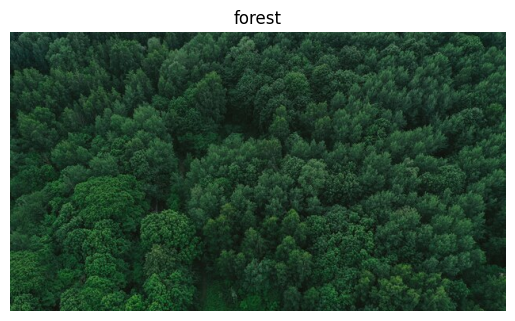

In [68]:
img = image_viewer(target_dir = "/content/drive/MyDrive/data/", target_class = "forest");

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./ 255,
                                   shear_range = 0.2,
                                   rotation_range = 0.2,
                                    )
valid_datagen = ImageDataGenerator(rescale = 1./ 255)

train_dir = "/content/drive/MyDrive/data/"
test_dir = "/content/drive/MyDrive/data/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                              #  target_size = (224, 224),
                                               class_mode = "categorical")

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                              #  target_size = (224, 224),
                                               class_mode = "categorical")
model_1 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(6, activation = "softmax")
])

Found 1177 images belonging to 6 classes.
Found 1177 images belonging to 6 classes.


In [73]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [74]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
30/37 [=======================>......] - ETA: 30s - loss: 1.5213 - accuracy: 0.3885

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 [==============================] - 42s 1s/step - loss: 1.0861 - accuracy: 0.6134 - val_loss: 1.0008 - val_accuracy: 0.6483
Epoch 3/5
37/37 [==============================] - 41s 1s/step - loss: 0.9412 - accuracy: 0.6661 - val_loss: 0.8177 - val_accuracy: 0.7511
Epoch 4/5
37/37 [==============================] - 41s 1s/step - loss: 0.7778 - accuracy: 0.7400 - val_loss: 0.7829 - val_accuracy: 0.7128
Epoch 5/5
37/37 [==============================] - 41s 1s/step - loss: 0.6701 - accuracy: 0.7732 - val_loss: 0.5883 - val_accuracy: 0.8479
